
# Extração de dados do Twitter e análise de sentimento

##### Atividade
- Extração de **1000 postagens no twitter** de *01/09/20* a *15/09/20* com os nomes das 5 figuras públicas: ```Bolsonaro```, ```Guedes```, ```Trump```,```Witzel```,```Lula```.
- Wordcloud para identificação das principais palavras presentes nas postagens
- Análise básica de sentimento, como forma de interpretar se os conteúdos postagens são em sua maioria **positivos ou negativos**


## 0) Importação de bibliotecas, pacotes e definições iniciais

In [1]:
!pip install python-twitter
!pip install pandasql
import pandasql
psql = lambda q: pandasql.sqldf(q, globals()) # Função para uso de SQL
!pip install wordcloud
import wordcloud as wc
import matplotlib.pyplot as plt
import requests
import pandas as pd

É necessário uma **conta developer** no twitter para utilizar a api ```python-twitter``` e substituir credenciais nas chaves de acesso abaixo.

In [ ]:
import twitter

api = twitter.Api(
        consumer_key='',
        consumer_secret='',
        access_token_key='',
        access_token_secret='')
sleep_on_rate_limit=True

## 1) Extração de dados do Twitter

- Trazer 1000 postagens através da ferramenta de ```GetSearch```
- Fazer wordcloud
        - Usar Stopwords para excluir termos genéricos

In [38]:
### Parâmetros de GetSearch:
### GetSearch(term=None, raw_query=None, geocode=None, since_id=None, max_id=None, until=None,
### since=None, count=15, lang=None, locale=None, result_type='mixed', include_entities=None, return_json=False)

bol=api.GetSearch(term="Bolsonaro",count=1000,since='2020-09-01',until='2020-09-15',lang='pt',return_json=False)
man=api.GetSearch(term="Guedes",count=1000,since='2020-09-01',until='2020-09-15',lang='pt',return_json=False)
tru=api.GetSearch(term="Trump",count=1000,since='2020-09-01',until='2020-09-15',lang='pt',return_json=False)
ron=api.GetSearch(term="Witzel",count=1000,since='2020-09-01',until='2020-09-15',lang='pt',return_json=False)
ney=api.GetSearch(term="Lula",count=1000,since='2020-09-01',until='2020-09-15',lang='pt',return_json=False)

Separar parte de ```'text'``` das postagens (se registra no formato de ```list```)

In [39]:
output_list_bol = []
for msg in bol:
    output_list_bol.append(msg.AsDict()['text'])
    
output_list_man = []
for msg in man:
    output_list_man.append(msg.AsDict()['text'])
    
output_list_tru = []
for msg in tru:
    output_list_tru.append(msg.AsDict()['text'])
    
output_list_ron = []
for msg in ron:
    output_list_ron.append(msg.AsDict()['text'])
    
output_list_ney = []
for msg in ney:
    output_list_ney.append(msg.AsDict()['text'])   

print(output_list_bol)
print(output_list_man)
print(output_list_tru)
print(output_list_ron)
print(output_list_ney)

['Bolsonaro diz q foi obrigado a sancionar o Fundão. Diz q o STF não o deixa agir na pandemia. Diz q vetou a anistia… https://t.co/igBEKRVEBD', 'Tribunal Penal Internacional rejeita denúncia contra Bolsonaro por crime contra humanidade https://t.co/FYWf7Ot4FP', 'URGENTE! Bolsonaro decide efetivar Pazuello como ministro da Saúde. Estamos vivendo a maior crise sanitária do país… https://t.co/Z2L8sXy0og', 'RT @BelaMegale: Alinhado a Bolsonaro, governador do Rio pede indicação a Paulo Guedes para sua equipe https://t.co/zc7CHi2Zs3', 'RT @Luana14870452: Nunca briguei por homem, até conhecer o Bolsonaro.', 'RT @taoquei1: "Dos fracos, covardes e omissos a história jamais se lembrará"\n             Bolsonaro, Jair.', 'E vamos nos mais uma vez ver a quase difunto lava jato tentando renascer em cima de @LulaOficial , qual a estratégi… https://t.co/3fDM9XdjJx', 'RT @PATRlOTAS: Governo Bolsonaro libera R$ 12 milhões para remédio de criança com AME.\nhttps://t.co/T0Ms1vKnXu', 'RT @Jouberth19: ÚLTIM

Transformar ```list``` em ```str```

In [40]:
output_str_bol = ""
for ele in output_list_bol:
    output_str_bol += ele

output_str_man = ""
for ele in output_list_man:
    output_str_man += ele    

output_str_tru = ""
for ele in output_list_tru:
    output_str_tru += ele
    
output_str_ron = ""
for ele in output_list_ron:
    output_str_ron += ele  

output_str_ney = ""
for ele in output_list_ney:
    output_str_ney += ele     
    
print(output_str_bol)
print(output_str_man)
print(output_str_tru)
print(output_str_ron)
print(output_str_ney)

Bolsonaro diz q foi obrigado a sancionar o Fundão. Diz q o STF não o deixa agir na pandemia. Diz q vetou a anistia… https://t.co/igBEKRVEBDTribunal Penal Internacional rejeita denúncia contra Bolsonaro por crime contra humanidade https://t.co/FYWf7Ot4FPURGENTE! Bolsonaro decide efetivar Pazuello como ministro da Saúde. Estamos vivendo a maior crise sanitária do país… https://t.co/Z2L8sXy0ogRT @BelaMegale: Alinhado a Bolsonaro, governador do Rio pede indicação a Paulo Guedes para sua equipe https://t.co/zc7CHi2Zs3RT @Luana14870452: Nunca briguei por homem, até conhecer o Bolsonaro.RT @taoquei1: "Dos fracos, covardes e omissos a história jamais se lembrará"
             Bolsonaro, Jair.E vamos nos mais uma vez ver a quase difunto lava jato tentando renascer em cima de @LulaOficial , qual a estratégi… https://t.co/3fDM9XdjJxRT @PATRlOTAS: Governo Bolsonaro libera R$ 12 milhões para remédio de criança com AME.
https://t.co/T0Ms1vKnXuRT @Jouberth19: ÚLTIMAS: Governo Bolsonaro transferiu R$ 

Carregar lista de **stop words** para remover da base

In [41]:

palavra_parada = requests.get("https://danielscarvalho.github.io/Insper-BigData/PortugueseStopWords.txt").text.split("\n")
palavra_parada=palavra_parada[1:-2]

Adicionar palavras adicionais observadas nas postagens

In [49]:
### palavras adicionais
palavra_parada.append('de')
palavra_parada.append('que')
palavra_parada.append('ao')
palavra_parada.append('da')
palavra_parada.append('na')
palavra_parada.append('Wed')
palavra_parada.append('Apr')
palavra_parada.append('Text')
palavra_parada.append('RT')
palavra_parada.append('Status')
palavra_parada.append('ID')
palavra_parada.append('ScreenName')
palavra_parada.append('Created')
palavra_parada.append('https')
palavra_parada.append('no')
palavra_parada.append('tá')
palavra_parada.append('Em')
palavra_parada.append('e')
palavra_parada.append('a')
palavra_parada.append('o')
palavra_parada.append('A')
palavra_parada.append('O')
palavra_parada.append('É')
palavra_parada.append('Aí')
palavra_parada.append('essa')
palavra_parada.append('vai')
palavra_parada.append('tá')
palavra_parada.append('E')
palavra_parada.append('RT')
palavra_parada.append('rt')
palavra_parada.append('se')
palavra_parada.append('ao')
palavra_parada.append('esse')
palavra_parada.append('tão')
palavra_parada.append('do')
palavra_parada.append('tco')
palavra_parada.append('Bolsonaro')
palavra_parada.append('bolsonaro')
palavra_parada.append('Guedes')
palavra_parada.append('guedes')
palavra_parada.append('Trump')
palavra_parada.append('trump')
palavra_parada.append('Lula')
palavra_parada.append('lula')
palavra_parada.append('Witzel')
palavra_parada.append('witzel')


Retirar palavras de parada e caracteres (necessário formato ```str```)

In [50]:
txt_bol = output_str_bol.lower().replace('\n',' ') \
                   .replace(',',"") \
                   .replace('.','') \
                   .replace('?','') \
                   .replace(":",'') \
                   .replace("//"," ")\
                   .replace("/"," ")\
                   .replace("...",'')
output_final_bol = []
for p in txt_bol.split():
    if p not in palavra_parada:
        output_final_bol.append(p)

txt_man = output_str_man.lower().replace('\n',' ') \
                   .replace(',',"") \
                   .replace('.','') \
                   .replace('?','') \
                   .replace(":",'') \
                   .replace("//"," ")\
                   .replace("/"," ")\
                   .replace("...",'')
output_final_man = []
for p in txt_man.split():
    if p not in palavra_parada:
        output_final_man.append(p)
            
txt_tru = output_str_tru.lower().replace('\n',' ') \
                   .replace(',',"") \
                   .replace('.','') \
                   .replace('?','') \
                   .replace(":",'') \
                   .replace("//"," ")\
                   .replace("/"," ")\
                   .replace("...",'')
output_final_tru = []
for p in txt_tru.split():
    if p not in palavra_parada:
        output_final_tru.append(p)  
        
txt_ron = output_str_ron.lower().replace('\n',' ') \
                   .replace(',',"") \
                   .replace('.','') \
                   .replace('?','') \
                   .replace(":",'') \
                   .replace("//"," ")\
                   .replace("/"," ")\
                   .replace("...",'')
output_final_ron = []
for p in txt_ron.split():
    if p not in palavra_parada:
        output_final_ron.append(p)    
        
txt_ney = output_str_ney.lower().replace('\n',' ') \
                   .replace(',',"") \
                   .replace('.','') \
                   .replace('?','') \
                   .replace(":",'') \
                   .replace("//"," ")\
                   .replace("/"," ")\
                   .replace("...",'')
output_final_ney = []
for p in txt_ney.split():
    if p not in palavra_parada:
        output_final_ney.append(p)           
        
print(output_final_bol)
print(output_final_man)
print(output_final_tru)
print(output_final_ron)
print(output_final_ney)

['q', 'obrigado', 'sancionar', 'fundão', 'q', 'stf', 'deixa', 'agir', 'pandemia', 'q', 'vetou', 'anistia…', 'igbekrvebdtribunal', 'penal', 'internacional', 'rejeita', 'denúncia', 'contra', 'crime', 'contra', 'humanidade', 'fywf7ot4fpurgente!', 'decide', 'efetivar', 'pazuello', 'ministro', 'saúde', 'estamos', 'vivendo', 'maior', 'crise', 'sanitária', 'país…', 'z2l8sxy0ogrt', '@belamegale', 'alinhado', 'governador', 'rio', 'pede', 'indicação', 'paulo', 'sua', 'equipe', 'zc7chi2zs3rt', '@luana14870452', 'nunca', 'briguei', 'homem', 'até', 'conhecer', 'bolsonarort', '@taoquei1', '"dos', 'fracos', 'covardes', 'omissos', 'história', 'jamais', 'lembrará"', 'jaire', 'vamos', 'nos', 'vez', 'quase', 'difunto', 'lava', 'jato', 'tentando', 'renascer', '@lulaoficial', 'estratégi…', '3fdm9xdjjxrt', '@patrlotas', 'governo', 'libera', 'r$', '12', 'milhões', 'remédio', 'criança', 'ame', 't0ms1vknxurt', '@jouberth19', 'últimas', 'governo', 'transferiu', 'r$', '12', 'milhões', 'família', 'marina', 'maced

Criação de **Wordclouds** e análise externa com base em resultados obtidos

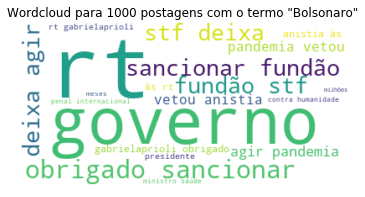

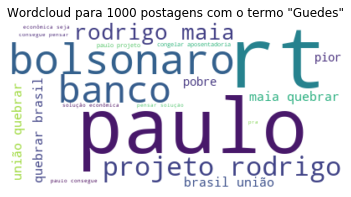

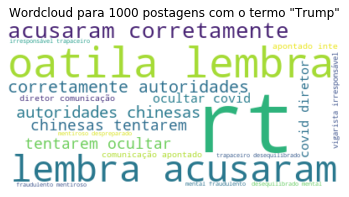

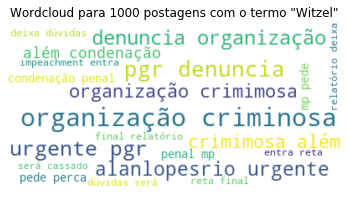

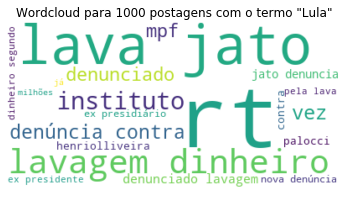

In [56]:
## Wordclouds
wordcloud = wc.WordCloud(max_font_size=100, 
                         max_words = 20, 
                         background_color="white").generate(" ".join(output_final_bol))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud para 1000 postagens com o termo "Bolsonaro"')
plt.show()


wordcloud = wc.WordCloud(max_font_size=100, 
                         max_words = 20, 
                         background_color="white").generate(" ".join(output_final_man))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud para 1000 postagens com o termo "Guedes"')
plt.show()



wordcloud = wc.WordCloud(max_font_size=100, 
                         max_words = 20, 
                         background_color="white").generate(" ".join(output_final_tru))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud para 1000 postagens com o termo "Trump"')
plt.show()


wordcloud = wc.WordCloud(max_font_size=100, 
                         max_words = 20, 
                         background_color="white").generate(" ".join(output_final_ron))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud para 1000 postagens com o termo "Witzel"')
plt.show()


wordcloud = wc.WordCloud(max_font_size=100, 
                         max_words = 20, 
                         background_color="white").generate(" ".join(output_final_ney))

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud para 1000 postagens com o termo "Lula"')
plt.show()


## 2) Análise de sentimento
- **Análise de sentimento** com base nas 1000 postagens por montadora
- Função para cálculo se total de postagens são **"positivas" ou "negativas"**
- **Plotagem gráfica** dos resultados


In [52]:
palavra_positiva = requests.get("https://danielscarvalho.github.io/Insper-BigData/positive_words_pt.txt").text.split("\r\n")
palavra_negativa = requests.get("https://danielscarvalho.github.io/Insper-BigData/negative_words_pt.txt").text.split("\r\n")

Lógica para **contagem de palavras positivas e negativas** para cada grupo de postagens

In [53]:
def sentimento(frase):
    saída = 0
    
    for p in frase.lower().split():
        
        if p in palavra_positiva:
            saída = saída + 1
        elif p in palavra_negativa:
            saída = saída - 1
    
    return saída

**Resultados**

In [57]:
Sentimento_Bolsonaro = sentimento(" ".join(output_final_bol))
Sentimento_Guedes = sentimento(" ".join(output_final_man))
Sentimento_Trump = sentimento(" ".join(output_final_tru))
Sentimento_Witzel = sentimento(" ".join(output_final_ron))
Sentimento_Lula = sentimento(" ".join(output_final_ney))

print(Sentimento_Bolsonaro)
print(Sentimento_Guedes)
print(Sentimento_Trump)
print(Sentimento_Witzel)
print(Sentimento_Lula)


-64
-58
-11
-129
-65


Plotagem para **visualização gráfica** de análise de sentimento

No handles with labels found to put in legend.


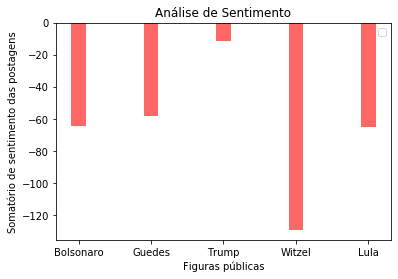

In [58]:
label_sentimento = ['Bolsonaro','Guedes','Trump','Witzel','Lula']
contagem_sentimento = [Sentimento_Bolsonaro,Sentimento_Guedes,Sentimento_Trump,Sentimento_Witzel,Sentimento_Lula]

x_pos = list(range(len(label_sentimento)))
bar_width = .2

plt.bar(x_pos,
        contagem_sentimento, 
        bar_width,
        align='center',
        alpha=0.6, 
        #label='Somatório', 
        color='r')


plt.xticks(x_pos,label_sentimento)

plt.ylabel('Somatório de sentimento das postagens')
plt.xlabel('Figuras públicas')
plt.title('Análise de Sentimento')
plt.legend()

plt.show()